<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/CA_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA Prophet

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

## New York Data

In [3]:
NY_labeledData = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_labeledData_Sep26.csv',low_memory=False)
NY_labeledData.tail()

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,population,label,growth_label,New Cases/1k population,growth_label_1k,growth_1k_pop
9799,2020-08-21,36099,Seneca County,0.0,0.0,0.0,0.0,-25.0,5.0,227.17,8.696,128,105.081709,1,0.864,0,0.285714,34016.0,LessSpread,mild_decrement,0.000000,flat_growth,0.000000
9800,2020-08-21,36023,Cortland County,0.0,0.0,0.0,0.0,-33.0,7.0,150.44,5.066,188,95.398588,1,0.803,0,0.142857,47581.0,LessSpread,mild_decrement,0.000000,flat_growth,0.000000
9801,2020-08-21,36101,Steuben County,0.0,0.0,0.0,0.0,-29.0,6.0,141.61,9.368,150,68.590352,1,0.674,1,0.714286,95379.0,LessSpread,mild_growth,0.010484,mild_growth,0.010484
9802,2020-08-21,36103,Suffolk County,0.0,0.0,0.0,0.0,-34.0,8.0,90.77,6.886,79,1618.991283,1,0.782,47,50.714286,1476601.0,LessSpread,mild_decrement,0.031830,mild_growth,0.021345
9803,2020-08-21,36123,Yates County,0.0,0.0,0.0,0.0,-22.0,0.0,366.07,10.392,149,73.676584,1,0.884,0,0.142857,24913.0,LessSpread,mild_decrement,0.000000,mild_decrement,-0.031830


In [4]:
NY_labeledData = NY_labeledData.astype({'label': 'string'})

In [5]:
NY_labeledData = NY_labeledData.dropna()

In [6]:
NY_labeledData['label_y'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData['label'])

In [7]:
NY_labeledData['County Name Label'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData['County Name'])

In [8]:
NY_labeledData.rename(columns={'Date': 'ds', 'label_y': 'y'}, inplace=True)

In [9]:
train, test = train_test_split(NY_labeledData, test_size=0.2, shuffle=False)

In [10]:
train.head()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,population,label,growth_label,New Cases/1k population,growth_label_1k,growth_1k_pop,y,County Name Label
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,305506.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,0
1,2020-03-01,36123,Yates County,31.0,33.0,0.0,0.0,7.0,0.0,28.14,5.004,72,73.676584,0,0.0,0,0.0,24913.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,56
2,2020-03-01,36021,Columbia County,21.0,4.0,0.0,25.0,4.0,0.0,19.75,5.337,58,93.682154,0,0.0,0,0.0,59461.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,9
3,2020-03-01,36095,Schoharie County,26.0,9.0,0.0,0.0,13.0,0.0,24.47,2.137,27,49.852047,0,0.0,0,0.0,30999.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,41
4,2020-03-01,36033,Franklin County,28.0,27.0,0.0,0.0,7.0,0.0,10.82,2.205,56,30.704920,0,0.0,0,0.0,50022.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,15


In [11]:
test.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,population,label,growth_label,New Cases/1k population,growth_label_1k,growth_1k_pop,y,County Name Label
9799,2020-08-21,36099,Seneca County,0.0,0.0,0.0,0.0,-25.0,5.0,227.17,8.696,128,105.081709,1,0.864,0,0.285714,34016.0,LessSpread,mild_decrement,0.000000,flat_growth,0.000000,0,43
9800,2020-08-21,36023,Cortland County,0.0,0.0,0.0,0.0,-33.0,7.0,150.44,5.066,188,95.398588,1,0.803,0,0.142857,47581.0,LessSpread,mild_decrement,0.000000,flat_growth,0.000000,0,10
9801,2020-08-21,36101,Steuben County,0.0,0.0,0.0,0.0,-29.0,6.0,141.61,9.368,150,68.590352,1,0.674,1,0.714286,95379.0,LessSpread,mild_growth,0.010484,mild_growth,0.010484,0,45
9802,2020-08-21,36103,Suffolk County,0.0,0.0,0.0,0.0,-34.0,8.0,90.77,6.886,79,1618.991283,1,0.782,47,50.714286,1476601.0,LessSpread,mild_decrement,0.031830,mild_growth,0.021345,0,46
9803,2020-08-21,36123,Yates County,0.0,0.0,0.0,0.0,-22.0,0.0,366.07,10.392,149,73.676584,1,0.884,0,0.142857,24913.0,LessSpread,mild_decrement,0.000000,mild_decrement,-0.031830,0,56


## Suffolk County

In [12]:
NY_labeledData_Suffolk = NY_labeledData[NY_labeledData['County Name'] == 'Suffolk County']
NY_labeledData_Suffolk = NY_labeledData_Suffolk.reset_index(drop=True)
NY_labeledData_Suffolk.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,population,label,growth_label,New Cases/1k population,growth_label_1k,growth_1k_pop,y,County Name Label
167,2020-08-17,36103,Suffolk County,0.0,0.0,0.0,0.0,-35.0,9.0,60.18,4.922,56,1618.991283,1,0.782,26,48.714286,1476601.0,LessSpread,mild_decrement,0.017608,mild_decrement,-0.002709,0,46
168,2020-08-18,36103,Suffolk County,0.0,0.0,0.0,0.0,-33.0,9.0,67.00,5.684,65,1618.991283,1,0.782,50,48.857143,1476601.0,LessSpread,mild_decrement,0.033862,mild_growth,0.020724,0,46
169,2020-08-19,36103,Suffolk County,0.0,0.0,0.0,0.0,-34.0,10.0,60.19,5.039,58,1618.991283,1,0.782,70,51.000000,1476601.0,LessSpread,mild_decrement,0.047406,mild_decrement,-0.011372,0,46
170,2020-08-20,36103,Suffolk County,0.0,0.0,0.0,0.0,-33.0,8.0,78.14,6.373,73,1618.991283,1,0.782,48,52.285714,1476601.0,LessSpread,mild_decrement,0.032507,mild_growth,0.006529,0,46
171,2020-08-21,36103,Suffolk County,0.0,0.0,0.0,0.0,-34.0,8.0,90.77,6.886,79,1618.991283,1,0.782,47,50.714286,1476601.0,LessSpread,mild_decrement,0.031830,mild_growth,0.021345,0,46


In [13]:
NY_labeledData_Suffolk.head()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,population,label,growth_label,New Cases/1k population,growth_label_1k,growth_1k_pop,y,County Name Label
0,2020-03-01,36103,Suffolk County,3.0,3.0,5.0,1.0,5.0,0.0,-9.23,5.112,58,1618.991283,0,0.0,0,0.0,1476601.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,46
1,2020-03-02,36103,Suffolk County,3.0,5.0,31.0,0.0,4.0,-1.0,3.28,8.617,99,1618.991283,0,0.0,0,0.0,1476601.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,46
2,2020-03-03,36103,Suffolk County,2.0,2.0,14.0,1.0,4.0,0.0,6.42,8.597,99,1618.991283,0,0.0,0,0.0,1476601.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,46
3,2020-03-04,36103,Suffolk County,5.0,6.0,30.0,1.0,4.0,-1.0,9.03,8.672,100,1618.991283,0,0.0,0,0.0,1476601.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,46
4,2020-03-05,36103,Suffolk County,4.0,6.0,37.0,3.0,4.0,-1.0,13.11,9.199,106,1618.991283,0,0.0,0,0.0,1476601.0,LessSpread,flat_growth,0.0,flat_growth,0.0,0,46


In [14]:
train_suffolk, test_suffolk = train_test_split(NY_labeledData_Suffolk, test_size=0.2, shuffle=False)

In [15]:
m = Prophet()

In [16]:
m.add_regressor('County Name Label') = 
m.add_regressor('retail and recreation')
m.add_regressor('grocery and pharmacy')
m.add_regressor('parks')
m.add_regressor('transit stations')
m.add_regressor('workplaces')
m.add_regressor('residential')
m.add_regressor('driving')
m.add_regressor('m50')
m.add_regressor('m50_index')
m.add_regressor('population_density')
m.add_regressor('mask_rule_active')
m.add_regressor('mask_wearing_percent')
m.add_regressor('New cases')
m.add_regressor('rolling_avg_new_cases')
m.add_regressor('growth_1k_pop')

In [17]:
m.fit(train_suffolk)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=35)
future.tail()

,ds
167,2020-08-17
168,2020-08-18
169,2020-08-19
170,2020-08-20
171,2020-08-21


In [28]:
future.shape

(172, 1)

In [23]:
train_suffolk.shape

(137, 25)

In [25]:
test_suffolk.shape

(35, 25)

In [26]:
NY_labeledData_Suffolk.shape

(172, 25)

In [29]:
future['County Name Label'] = NY_labeledData_Suffolk['County Name Label']
future['retail and recreation'] = NY_labeledData_Suffolk['retail and recreation']
future['grocery and pharmacy'] = NY_labeledData_Suffolk['grocery and pharmacy']
future['parks'] = NY_labeledData_Suffolk['parks']
future['transit stations'] = NY_labeledData_Suffolk['transit stations'] 
future['workplaces'] = NY_labeledData_Suffolk['workplaces'] 
future['residential'] = NY_labeledData_Suffolk['residential']
future['driving'] = NY_labeledData_Suffolk['driving']
future['m50'] = NY_labeledData_Suffolk['m50']
future['m50_index'] = NY_labeledData_Suffolk['m50_index'] 
future['population_density'] = NY_labeledData_Suffolk['population_density']
future['mask_rule_active'] = NY_labeledData_Suffolk['mask_rule_active']
future['mask_wearing_percent'] = NY_labeledData_Suffolk['mask_wearing_percent']
future['New cases'] = NY_labeledData_Suffolk['New cases']
future['rolling_avg_new_cases'] = NY_labeledData_Suffolk['rolling_avg_new_cases']
future['growth_1k_pop'] = NY_labeledData_Suffolk['growth_1k_pop']
future.tail()

,ds,County Name Label,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,growth_1k_pop
167,2020-08-17,46,0.0,0.0,0.0,0.0,-35.0,9.0,60.18,4.922,56,1618.991283,1,0.782,26,48.714286,-0.002709
168,2020-08-18,46,0.0,0.0,0.0,0.0,-33.0,9.0,67.00,5.684,65,1618.991283,1,0.782,50,48.857143,0.020724
169,2020-08-19,46,0.0,0.0,0.0,0.0,-34.0,10.0,60.19,5.039,58,1618.991283,1,0.782,70,51.000000,-0.011372
170,2020-08-20,46,0.0,0.0,0.0,0.0,-33.0,8.0,78.14,6.373,73,1618.991283,1,0.782,48,52.285714,0.006529
171,2020-08-21,46,0.0,0.0,0.0,0.0,-34.0,8.0,90.77,6.886,79,1618.991283,1,0.782,47,50.714286,0.021345


In [30]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,County Name Label,County Name Label_lower,County Name Label_upper,New cases,New cases_lower,New cases_upper,additive_terms,additive_terms_lower,additive_terms_upper,driving,driving_lower,driving_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,grocery and pharmacy,grocery and pharmacy_lower,grocery and pharmacy_upper,growth_1k_pop,growth_1k_pop_lower,growth_1k_pop_upper,m50,m50_lower,m50_upper,m50_index,m50_index_lower,m50_index_upper,mask_rule_active,mask_rule_active_lower,mask_rule_active_upper,mask_wearing_percent,mask_wearing_percent_lower,mask_wearing_percent_upper,parks,parks_lower,parks_upper,population_density,population_density_lower,population_density_upper,residential,residential_lower,residential_upper,retail and recreation,retail and recreation_lower,retail and recreation_upper,rolling_avg_new_cases,rolling_avg_new_cases_lower,rolling_avg_new_cases_upper,transit stations,transit stations_lower,transit stations_upper,weekly,weekly_lower,weekly_upper,workplaces,workplaces_lower,workplaces_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
167,2020-08-17,0.116825,-1.344905,-0.399930,0.115406,0.118244,0.000231,0.000231,0.000231,-0.048824,-0.048824,-0.048824,-1.003708,-1.003708,-1.003708,-0.253280,-0.253280,-0.253280,-0.925758,-0.925758,-0.925758,0.070096,0.070096,0.070096,0.013237,0.013237,0.013237,0.004958,0.004958,0.004958,-0.015165,-0.015165,-0.015165,-0.176021,-0.176021,-0.176021,-0.260205,-0.260205,-0.260205,-0.053922,-0.053922,-0.053922,0.286036,0.286036,0.286036,-0.066611,-0.066611,-0.066611,-0.534488,-0.534488,-0.534488,0.470415,0.470415,0.470415,-0.363909,-0.363909,-0.363909,-0.077950,-0.077950,-0.077950,0.001692,0.001692,0.001692,0.0,0.0,0.0,-0.886883
168,2020-08-18,0.117761,-1.369848,-0.434810,0.116266,0.119253,0.000231,0.000231,0.000231,-0.044543,-0.044543,-0.044543,-1.013103,-1.013103,-1.013103,-0.283239,-0.283239,-0.283239,-0.968127,-0.968127,-0.968127,0.070096,0.070096,0.070096,0.010162,0.010162,0.010162,0.007149,0.007149,0.007149,-0.022119,-0.022119,-0.022119,-0.176021,-0.176021,-0.176021,-0.260205,-0.260205,-0.260205,-0.053922,-0.053922,-0.053922,0.286036,0.286036,0.286036,-0.066611,-0.066611,-0.066611,-0.534488,-0.534488,-0.534488,0.470146,0.470146,0.470146,-0.363909,-0.363909,-0.363909,-0.044976,-0.044976,-0.044976,-0.006892,-0.006892,-0.006892,0.0,0.0,0.0,-0.895342
169,2020-08-19,0.118696,-1.249686,-0.370480,0.117155,0.120265,0.000231,0.000231,0.000231,-0.040975,-0.040975,-0.040975,-0.918320,-0.918320,-0.918320,-0.253324,-0.253324,-0.253324,-0.914880,-0.914880,-0.914880,0.070096,0.070096,0.070096,0.014374,0.014374,0.014374,0.005295,0.005295,0.005295,-0.016710,-0.016710,-0.016710,-0.176021,-0.176021,-0.176021,-0.260205,-0.260205,-0.260205,-0.053922,-0.053922,-0.053922,0.286036,0.286036,0.286036,-0.054866,-0.054866,-0.054866,-0.534488,-0.534488,-0.534488,0.466107,0.466107,0.466107,-0.363909,-0.363909,-0.363909,-0.003440,-0.003440,-0.003440,-0.002600,-0.002600,-0.002600,0.0,0.0,0.0,-0.799624
170,2020-08-20,0.119632,-1.439348,-0.535179,0.118026,0.121279,0.000231,0.000231,0.000231,-0.044899,-0.044899,-0.044899,-1.100923,-1.100923,-1.100923,-0.332177,-0.332177,-0.332177,-1.037965,-1.037965,-1.037965,0.070096,0.070096,0.070096,0.012025,0.012025,0.012025,0.009131,0.009131,0.009131,-0.028300,-0.028300,-0.028300,-0.176021,-0.176021,-0.176021,-0.260205,-0.260205,-0.260205,-0.053922,-0.053922,-0.053922,0.286036,0.286036,0.286036,-0.078355,-0.078355,-0.078355,-0.534488,-0.534488,-0.534488,0.463683,0.463683,0.463683,-0.363909,-0.363909,-0.363909,-0.062957,-0.062957,-0.062957,-0.006892,-0.006892,-0.006892,0.0,0.0,0.0,-0.981291
171,2020-08-21,0.120568,-1.506631,-0.641904,0.118911,0.122299,0.000231,0.000231,0.000231,-0.045078,-0.045078,-0.045078,-1.189146,-1.189146,-1.189146,-0.387660,-0.387660,-0.387660,-1.091478,-1.091478,-1.091478,0.070096,0.070096,0.070096,0.010081,0.010081,0

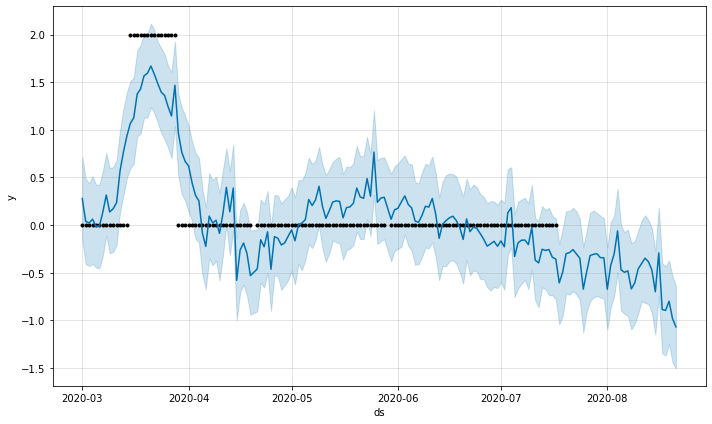

In [31]:
fig1 = m.plot(forecast)

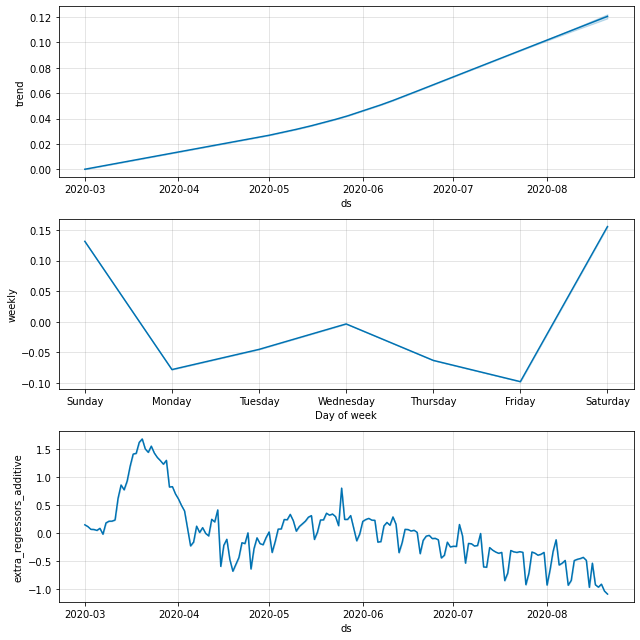

In [32]:
fig2 = m.plot_components(forecast)

In [33]:
plot_components_plotly(m, forecast)

In [34]:
plot_plotly(m, forecast)

In [39]:
cross_validation_results = cross_validation(m, period='15 days', horizon='34 days')
print(cross_validation_results)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-06-13 00:00:00 and 2020-06-13 00:00:00



           ds      yhat  yhat_lower  yhat_upper  y     cutoff
0  2020-06-14 -0.200165   -0.636237    0.227664  0 2020-06-13
1  2020-06-15 -0.349039   -0.797318    0.098773  0 2020-06-13
2  2020-06-16 -0.445567   -0.925465   -0.015404  0 2020-06-13
3  2020-06-17 -0.463310   -0.873454   -0.031069  0 2020-06-13
4  2020-06-18 -0.603934   -1.041462   -0.167737  0 2020-06-13
5  2020-06-19 -0.683673   -1.122877   -0.257679  0 2020-06-13
6  2020-06-20 -0.584530   -1.000861   -0.154304  0 2020-06-13
7  2020-06-21 -0.033385   -0.481159    0.393338  0 2020-06-13
8  2020-06-22 -0.675600   -1.095583   -0.229096  0 2020-06-13
9  2020-06-23 -0.752085   -1.169037   -0.306691  0 2020-06-13
10 2020-06-24 -0.732575   -1.172835   -0.320207  0 2020-06-13
11 2020-06-25 -0.868613   -1.318066   -0.438731  0 2020-06-13
12 2020-06-26 -0.942343   -1.371947   -0.489056  0 2020-06-13
13 2020-06-27 -0.755062   -1.190107   -0.338715  0 2020-06-13
14 2020-06-28 -0.658387   -1.061379   -0.225473  0 2020-06-13
15 2020

In [40]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

INFO:fbprophet:Skipping MAPE because y close to 0


   horizon       mse      rmse       mae  mdape  coverage
0   3 days  0.120141  0.346614  0.331590    inf  0.666667
1   4 days  0.178338  0.422301  0.419305    inf  0.333333
2   5 days  0.259308  0.509222  0.504270    inf  0.000000
3   6 days  0.348934  0.590706  0.583639    inf  0.000000
4   7 days  0.391273  0.625518  0.624046    inf  0.000000
5   8 days  0.270066  0.519679  0.433863    inf  0.333333
6   9 days  0.266408  0.516148  0.431172    inf  0.333333
7  10 days  0.341061  0.584004  0.487023    inf  0.333333
8  11 days  0.519578  0.720817  0.720087    inf  0.000000
9  12 days  0.618929  0.786720  0.784424    inf  0.000000
10 13 days  0.726388  0.852284  0.847844    inf  0.000000
11 14 days  0.737539  0.858801  0.855339    inf  0.000000
12 15 days  0.630534  0.794062  0.785264    inf  0.000000
13 16 days  0.607299  0.779294  0.772684    inf  0.000000
14 17 days  0.796575  0.892511  0.876578    inf  0.000000
15 18 days  0.999472  0.999736  0.997404    inf  0.000000
16 19 days  1.